# Youtube Video & Channel Data Analysis
By Pin-Huey Chiang, Hung-Yi Lin

**This data analysis provided information for people who wants to become Youtuber of how to earn money and become a successful Youtuber.**

**Possible factors to become a successful Youtuber:**
1. Youtube channel types (types that most people like to watch)
2. Have many subscribers and video views 
3. Youtube channels that have more trending videos

**Measurements of whether a Youtube channel is successful:**
1. Amount of money they earned
2. Number of subscribers
3. Number of video views
4. Number of trending videos
5. Film the right category

## Hypothesis
1. Top 250 ranking Youtubers (by grade, subs, views) in the U.S. will have more chances to earn more money than office workers
2. As a full-time Youtuber, it will be more profitable to film entertainment videos than other types of videos such as comedy, music, fashion, knowledge, and etc
3. Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc
4. The video category that has the most trending videos will have more subscribers than other categories. 
    - Does more trending videos make them enter top 250 us youtubers
    - On the other hand, does top 250 youtubers (by grade, subs, views) means they have they most trending videos 
    - does more subscribers means more video views (have relationship???)

**Part 2: What video types people like the most? / Is there a relationship between trending videos and Top 250 Youtubers?**

## Hypothesis 3 - Youtube Trending: Know what viewers want to see the most
YouTube Trendings aims to let the users know what’s happening on YouTube and in the world. Thus, YouTube trending videos shows that they are appealing to a wide range of viewers, capture the breadth of what’s happening on YouTube and in the world, or surprising or novel in the specific moment. Trending Youtube videos are determined by several signals such as view count, the rate of growth in views, where views are coming from (including outside of YouTube), and the age of the video. This means that the highest view count on a given day may not be #1 on Trending. In addition, even if one video meets all the criteria, it does not mean it will definitly enter Trending. The Trending system tries to choose videos that will be most relevant to their viewers and most reflective of the broad content on the platform.

Therefore, by analyzing the Youtube trending videos, we can get an insight of what types of videos Youtube thinks viewers would want to see the most, and reflects to the events that happened in the given time. 

Source: https://support.google.com/youtube/answer/7239739?hl=en

### Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge.

In [ ]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
trending_df = pd.read_csv('data/USvideos.csv')
category_id = pd.read_json('data/US_category_id.json')

In [3]:
len(trending_df)

40949

### Data Preprocessing of Trending Video Dataset
1. change category id to category name based on the US_category_id.json file
2. change the trending date and publish time to pandas timestamp
3. calculate the days one video spent to trend

In [4]:
# import category_id json file and dataframe 
def catId_to_name(catid, videodf):
    """ This function replaces category id to category name based on the json file.

    :param catid: category id which is resorded in the US_category_id.json file
    :param videodf: youtube video dataframe
    :return: category dictionary. key = id, value = category name
    """
    cat_dict = {}
    for i in range(len(catid)):
        id = int(category_id['items'][i]['id'])
        name = catid['items'][i]['snippet']['title']
        cat_dict[id] = name
    return cat_dict

In [6]:
# add category name to the dataframe
category_dict = catId_to_name(category_id, trending_df)
trending_df['category_name'] = trending_df['category_id'].replace(category_dict)

In [7]:
# change publish time type to datetime
trending_df['publish_time'] = trending_df.publish_time.str[:10]
trending_df['publish_time'] = pd.to_datetime(trending_df['publish_time'])

In [8]:
# change trending date format to datetime format
trending_df['trending_date'] = trending_df['trending_date'].apply(lambda date: re.sub(r'(\d+).(\d+).(\d+)', r'20\1-\3-\2', date))
trending_df['trending_date'] = pd.to_datetime(trending_df['trending_date'])

In [10]:
# show the earliest and latest video publish date
min(trending_df['publish_time']), max(trending_df['publish_time']) 

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [11]:
# show the earliest and latest video trending date, which also represents the data capture time period
min(trending_df['trending_date']), max(trending_df['trending_date']) 

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [13]:
# calculate the days one video spent to become a trending video 
trending_df['days_spent_to_trend'] = trending_df['trending_date'] - trending_df['publish_time']
days = trending_df['days_spent_to_trend'].astype(str).str.split(" ", n = 1, expand = True)
trending_df['days_spent_to_trend'] = days[0].astype(int)

In [14]:
trending_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,days_spent_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2


### Trending Video Analysis

Show the earliest and latest video publish date, earliest and latest video trending data

In [16]:
trending_df['Month'] = trending_df['trending_date'].dt.month.astype(str) # .apply(lambda x: look_up[x])
trending_df['Year'] = trending_df['trending_date'].dt.year.astype(str)
trending_df['trend_MY'] = trending_df['Year']+'-'+trending_df['Month']
trending_df['trend_MY'] = pd.to_datetime(trending_df['trend_MY'])

# create a pivot table to see the number of trendings in each category in each month
trend_monpi = pd.pivot_table(trending_df, values=['category_id'], index=['trend_MY'], columns=['category_name'], aggfunc='count').fillna(0)

trend_monpi.index = ['Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018']
trend_monpi.columns = trend_monpi.columns.droplevel()

In [17]:
trend_monpi

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
Nov 2017,47.0,315.0,138.0,790.0,174.0,22.0,319.0,613.0,221.0,1.0,247.0,56.0,237.0,0.0,195.0,25.0
Dec 2017,58.0,579.0,224.0,1549.0,360.0,63.0,560.0,950.0,547.0,13.0,518.0,127.0,289.0,9.0,278.0,76.0
Jan 2018,91.0,465.0,254.0,1288.0,354.0,112.0,551.0,758.0,500.0,16.0,467.0,200.0,347.0,7.0,330.0,56.0
Feb 2018,129.0,423.0,235.0,1243.0,295.0,75.0,479.0,777.0,521.0,18.0,442.0,156.0,385.0,0.0,321.0,72.0
Mar 2018,16.0,524.0,328.0,1537.0,337.0,122.0,810.0,810.0,195.0,0.0,508.0,136.0,446.0,0.0,334.0,80.0
Apr 2018,34.0,407.0,204.0,1160.0,264.0,92.0,557.0,747.0,164.0,0.0,471.0,88.0,251.0,16.0,297.0,48.0
May 2018,9.0,510.0,207.0,1701.0,355.0,180.0,617.0,1121.0,276.0,5.0,401.0,101.0,336.0,19.0,332.0,29.0
Jun 2018,0.0,234.0,66.0,696.0,206.0,151.0,253.0,696.0,63.0,4.0,156.0,56.0,110.0,6.0,87.0,16.0


In [ ]:
# use heatmap to visualize trend_monpi
# sns.heatmap(trend_monpi, annot=True, cmap="Blues")

In [19]:
#calculate the percentage of number of trending videos per month in each category
trend_monpi_percent = (trend_monpi / trend_monpi.sum(axis = 0, skipna = True)).round(2)

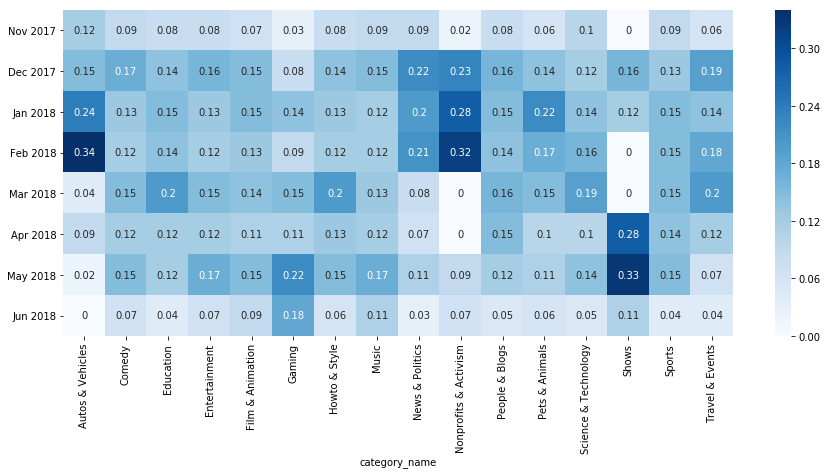

In [26]:
# create a heatmap to visualize it
plt.subplots(figsize=(15,6))
sns.heatmap(trend_monpi_percent, annot=True, cmap="Blues")

In [27]:
#check the statistic summary of views in each category
view_describe = trending_df[['category_name', 'views']].groupby('category_name').describe()
view_describe

views                                                  \
                        count          mean           std      min        25%   
category_name                                                                   
Autos & Vehicles        384.0  1.355965e+06  3.373464e+06   2860.0  104652.75   
Comedy                 3457.0  1.480308e+06  2.009899e+06   1807.0  351261.00   
Education              1656.0  7.129408e+05  8.792676e+05    773.0  249115.25   
Entertainment          9964.0  2.067883e+06  5.815996e+06    798.0  273394.75   
Film & Animation       2345.0  3.106250e+06  5.576255e+06    943.0  302850.00   
Gaming                  817.0  2.620831e+06  3.165318e+06   1237.0  530676.00   
Howto & Style          4146.0  9.837301e+05  1.928995e+06   1107.0  215422.25   
Music                  6472.0  6.201003e+06  1.545988e+07   1591.0  382714.75   
News & Politics        2487.0  5.925877e+05  1.118918e+06    549.0   50855.00   
Nonprofits & Activism    57.0  2.963884e+06  7.131112e+06   1456.0   11453.00   
People & Blogs         3210.0  1.531835e+06  3.459637e+06    884.0  202658.50   
Pets & Animals          920.0  8.311435e+05  1.102091e+06   3393.0  185072.25   
Science & Technology   2401.0  1.452627e+06  3.445705e+06    983.0  239189.00   
Shows                    57.0  9.035273e+05  5.108668e+05  36609.0  178191.00   
Sports                 2174.0  2.025969e+06  4.017255e+06    658.0  194181.50   
Travel & Events         402.0  8.546196e+05  1.918995e+06    789.0  221528.50   

                                                           
                             50%         75%          max  
category_name                                              
Autos & Vehicles        406278.0  1074284.25   25244097.0  
Comedy                  980236.0  1877801.00   29178096.0  
Education               419440.5   772115.00    7349435.0  
Entertainment           734704.0  1733746.25  149376127.0  
Film & Animation       1274578.0  3227166.00   54863912.0  
Gaming                 1494142.0  3202761.00   16935442.0  
Howto & Style           502783.0  1098035.75   54155921.0  
Music                  1434128.0  4947952.75  225211923.0  
News & Politics         244014.0   685282.00   10277358.0  
Nonprofits & Activism    73649.0   316467.00   24286474.0  
People & Blogs          599139.0  1686941.50   56111957.0  
Pets & Animals          444501.5   941298.75    6187457.0  
Science & Technology    585748.0  1375783.00   42799458.0  
Shows                  1155692.0  1309964.00    1445949.0  
Sports                  559352.0  1406208.50   29090799.0  
Travel & Events         494825.5   985693.25   23932421.0

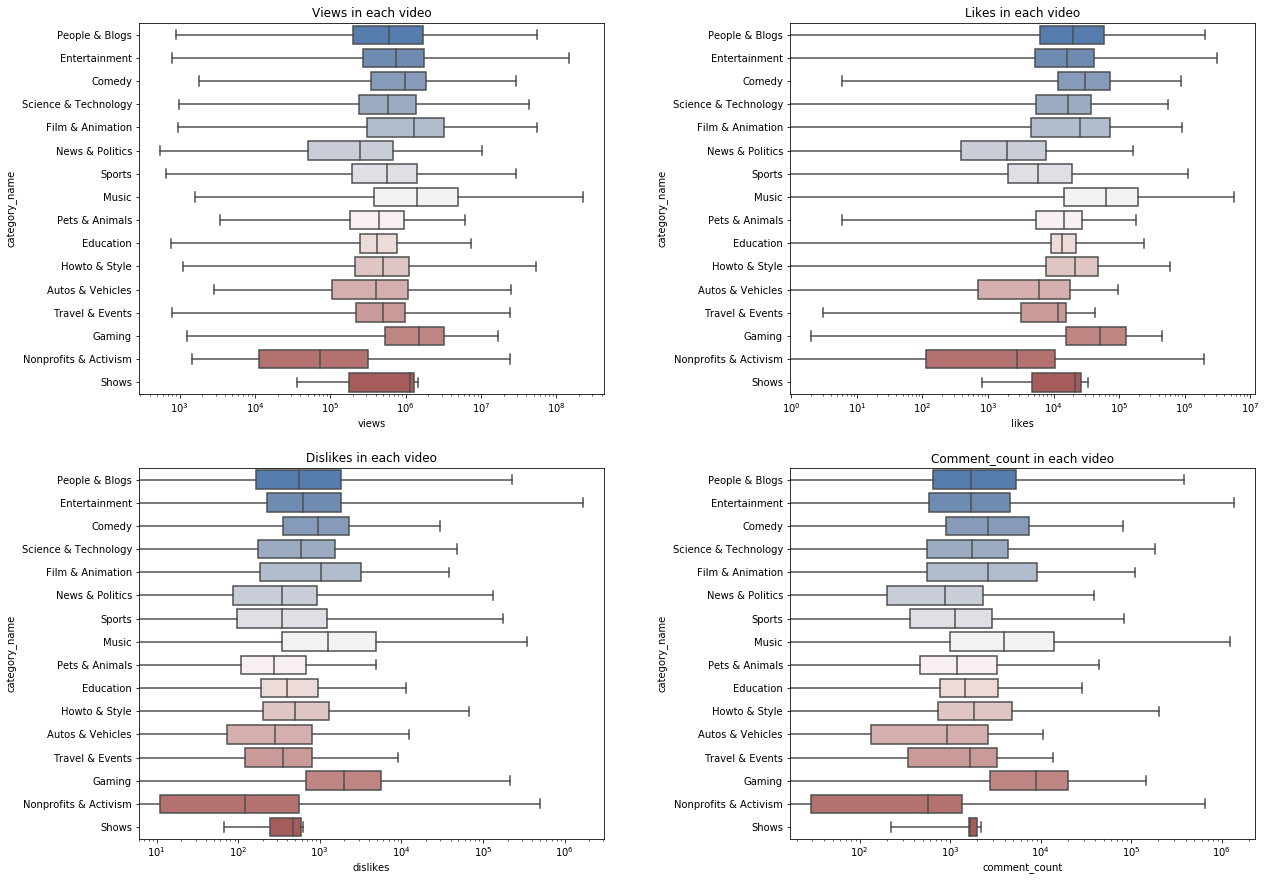

In [28]:
#create box plot for 
df_colname = ['views', 'likes', 'dislikes', 'comment_count']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(df_colname):
    
    box = sns.boxplot(x=df_colname[i], y='category_name', data=trending_df, whis="range", palette="vlag", ax=axes[i // 2, i % 2])
    box.set(xscale="log") #rescale boxplot x-axis with log
    axes[i // 2, i % 2].set_title(df_colname[i].capitalize()+ ' in each video')

fig.subplots_adjust(wspace=.4)

In [121]:
# create a pivot table to calculate the "total" number of videos upload, views, likes, dislikes, comment counts, days spend to trend in each category
trending_pi = pd.pivot_table(trending_df, values=['views', 'likes', 'dislikes', 'comment_count', 'video_id', 'days_spent_to_trend'], 
                             index=['category_name'], aggfunc={'views': np.sum, 'likes': np.sum, 'dislikes': np.sum, 
                                                            'comment_count': np.sum,'video_id': 'count', 
                                                               'days_spent_to_trend':np.sum})

trending_pi = trending_pi[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']]
trending_pi.columns = ['video_count', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']
trending_pi = trending_pi.sort_values('video_count', ascending=False)
trending_pi

,video_count,views,likes,dislikes,comment_count,days_spent_to_trend
category_name,,,,,,
Entertainment,9964,20604388195,530516491,42987663,73566498,129617
Music,6472,40132892190,1416838584,51179008,125296396,95292
Howto & Style,4146,4078545064,162880075,5473899,23149550,32809
Comedy,3457,5117426208,216346746,7230391,22545582,34941
People & Blogs,3210,4917191726,186615999,10187901,24778032,50350
News & Politics,2487,1473765704,18151033,4180049,6039433,46213
Science & Technology,2401,3487756816,82532638,4548402,11989926,43612
Film & Animation,2345,7284156721,165997476,6075148,17887060,96286
Sports,2174,4404456673,98621211,5133551,11192155,50992


In [36]:
# find categories that do not enter the trending videos 
trendcat = list(trending_pi.index)
catList = list(category_dict.values())
not_trend_cat = []
for i in range(len(catList)):
    if catList[i] not in trendcat:
        not_trend_cat.append(catList[i])
print(len(not_trend_cat))
print(not_trend_cat)

15
['Short Movies', 'Videoblogging', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Trailers']


In [42]:
# count average number of 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend' per video in each category
trending_pi_avg = trending_pi[['views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']].div(trending_pi['video_count'], axis=0).round(2)

# calculate the percentage of likes and dislikes
trending_pi_avg['likes(%)'] = trending_pi_avg['likes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])
trending_pi_avg['dislikes(%)'] = trending_pi_avg['dislikes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])

trending_pi_avg.columns = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count', 'Avg Days Spent to Trend', 'Likes(%)', 'Dislikes(%)']
trending_pi_avg

,Avg Views,Avg Likes,Avg Dislikes,Avg Comment Count,Avg Days Spent to Trend,Likes(%),Dislikes(%)
category_name,,,,,,,
Entertainment,2067883.20,53243.33,4314.30,7383.23,13.01,0.925044,0.074956
Music,6201003.12,218918.20,7907.76,19359.76,14.72,0.965137,0.034863
Howto & Style,983730.12,39286.08,1320.28,5583.59,7.91,0.967486,0.032514
Comedy,1480308.42,62582.22,2091.52,6521.72,10.11,0.967660,0.032340
People & Blogs,1531835.43,58135.83,3173.80,7719.01,15.69,0.948233,0.051767
News & Politics,592587.74,7298.36,1680.76,2428.40,18.58,0.812815,0.187185
Science & Technology,1452626.75,34374.28,1894.38,4993.72,18.16,0.947768,0.052232
Film & Animation,3106250.20,70787.84,2590.68,7627.74,41.06,0.964694,0.035306
Sports,2025969.03,45363.94,2361.34,5148.19,23.46,0.950522,0.049478


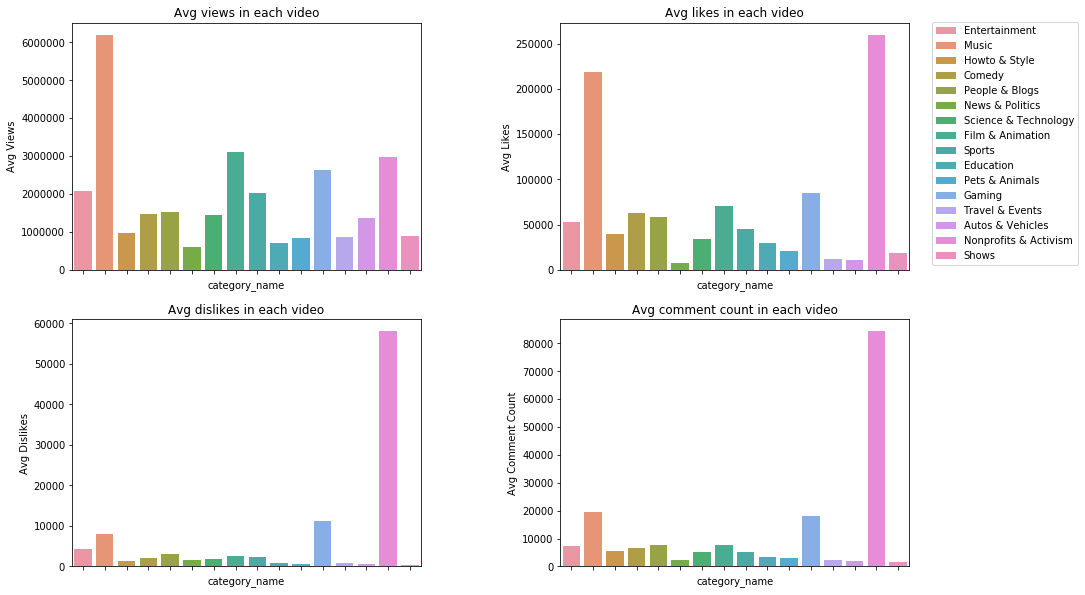

In [43]:
colname = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(colname):
    if i != len(colname)-1:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2])
    else:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2], hue=trending_pi_avg.index, dodge=False)
    axes[i // 2, i % 2].set_xticklabels('')
    axes[i // 2, i % 2].set_title(colname[i].capitalize()+ ' in each video')


fig.subplots_adjust(wspace=.4)
plt.legend(bbox_to_anchor=(1.05, 2.225), loc=2, ncol=1)

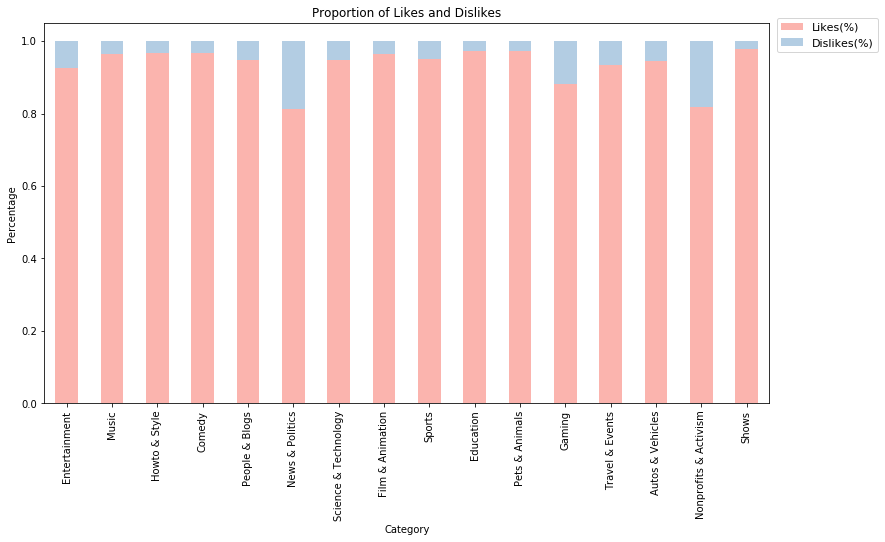

In [44]:
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
ax = trending_pi_avg[['Likes(%)', 'Dislikes(%)']].plot(kind='bar', stacked=True, align='center', figsize=(13,7),
                                                       color=colors,title='Proportion of Likes and Dislikes')
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(trending_pi_avg.index)
plt.legend(loc=(1.01, 0.923),prop={'size':11})
ax

In [45]:
#check the statistic summary of days spent to trend in each category
days_describe = trending_df[['category_name', 'days_spent_to_trend']].groupby('category_name').describe()
days_describe

days_spent_to_trend                                   \
                                    count       mean         std  min  25%   
category_name                                                                
Autos & Vehicles                    384.0  43.205729  211.839172  0.0  3.0   
Comedy                             3457.0  10.107318   80.293618  0.0  3.0   
Education                          1656.0  37.964976  267.754922  0.0  3.0   
Entertainment                      9964.0  13.008531  103.645881  0.0  3.0   
Film & Animation                   2345.0  41.060128  275.015852  0.0  4.0   
Gaming                              817.0  21.953488  169.573045  0.0  3.0   
Howto & Style                      4146.0   7.913411   28.127720  0.0  3.0   
Music                              6472.0  14.723733  143.542246  0.0  3.0   
News & Politics                    2487.0  18.581825  174.811169  0.0  3.0   
Nonprofits & Activism                57.0   5.385965    2.932298  1.0  3.0   
People & Blogs                     3210.0  15.685358  116.212819  0.0  3.0   
Pets & Animals                      920.0   7.723913   18.314739  1.0  4.0   
Science & Technology               2401.0  18.164098  147.055060  0.0  3.0   
Shows                                57.0  10.719298    6.999373  1.0  5.0   
Sports                             2174.0  23.455382  209.833051  0.0  2.0   
Travel & Events                     402.0   7.057214    5.763347  0.0  4.0   

                                          
                       50%   75%     max  
category_name                             
Autos & Vehicles       5.0   7.0  1771.0  
Comedy                 5.0   8.0  1951.0  
Education              5.0   8.0  3027.0  
Entertainment          5.0   8.0  4215.0  
Film & Animation       6.0  10.0  3566.0  
Gaming                 6.0  10.0  2203.0  
Howto & Style          6.0   9.0   945.0  
Music                  6.0  10.0  3451.0  
News & Politics        4.0   6.0  2490.0  
Nonprofits & Activism  5.0   7.0    14.0  
People & Blogs         5.0   8.0  2115.0  
Pets & Animals         6.0   9.0   386.0  
Science & Technology   5.0   9.0  2818.0  
Shows                  9.0  15.0    27.0  
Sports                 4.0   7.0  2940.0  
Travel & Events        6.0   9.0    60.0

Text(0.5, 1.0, 'Days spent to trend in each video')

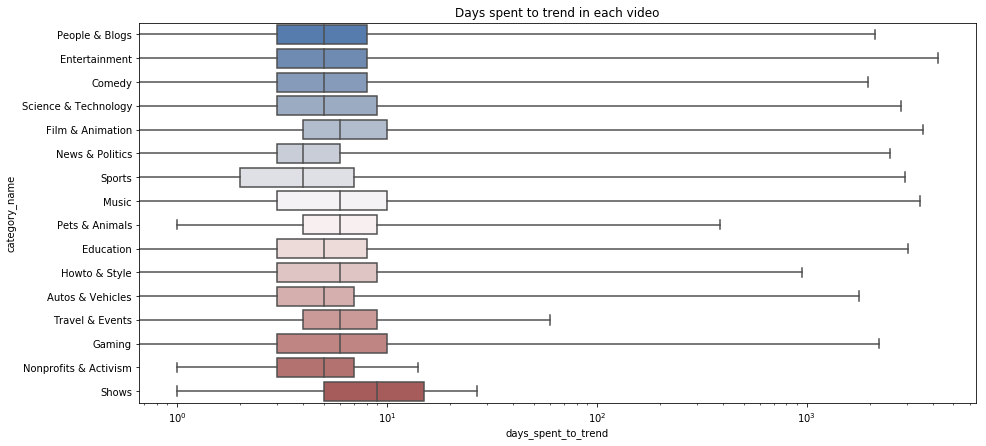

In [48]:
plt.subplots(figsize=(15,7))
days_box = sns.boxplot(x='days_spent_to_trend', y='category_name', data=trending_df, whis="range", palette="vlag")
days_box.set(xscale="log") #rescale boxplot x-axis with log
days_box.set_title('Days spent to trend in each video')

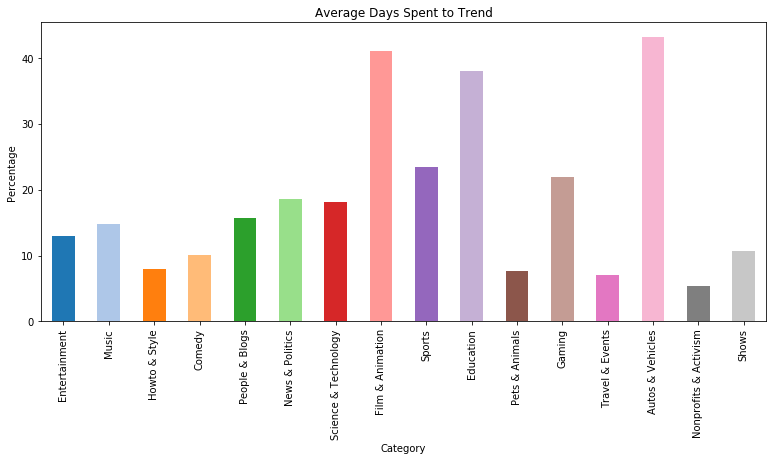

In [49]:
# sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = 'Avg Days Spent to Trend', dodge=False)
# sns.set(rc={'figure.figsize':(20,5)})
colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = trending_pi_avg['Avg Days Spent to Trend'].plot(kind='bar', align='center', figsize=(13,5.5),
                                                       color=colors,title='Average Days Spent to Trend')
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(trending_pi_avg.index)
ax

### Findings

Entertainment has the most trending videos, music, howto&style(fashion), comedy, people&blogs(daily life), news&politics are other famous videos. 15 categories did not have any trending videos from 2017-11-14 to 2018-06-14. (data collection date)

Although entertainment videos have the most trending videos during the data captured period, it does not mean filming entertainment videos will definitely make your videos trend more. The proportion of "num of trending videos / num of videos upload entertainment" may not be the highest.

However, there is no data to know how many numbers of videos upload during a specific period so it is hard to know the percentage of trending videos among the number of uploads in one category. Therefore, need to find other indicators. Ex: num of views/likes/dislikes/comments in per trending video, average time a video need to spend from publish to upload

Most of the videos spent average 1 to 10 days to become trending videos. Outliers some spend within 1 day to trend, while others spent years to trend.

Although nonprofits & activism have less trending video counts, but its average likes, dislikes, number of comments per video is the highests, and the days it spend to trend are shorter than most of the categories. 

## Hypothesis 4 - Is there a relationship between Top YouTubers and Trending videos?
### The video category that has the most trending videos will have more subscribers than other categories. 
- Does most categories with most trending videos in accordance with the most profitable categories?
- Does more trending videos make them enter top 250 us youtubers 
- Does top 250 youtubers (by grade, subs, views) means they have they most trending videos 

In [122]:
# load data
top250_subs = pd.read_csv('data/top250_us_youtube_by_subs.csv')

In [149]:
len(top250_subs.columns)

19

In [123]:
top250_subs = top250_subs.drop(top250_subs.columns[0], axis=1)
top250_subs.head()

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL
0,1,A+,PewDiePie,3806,94275479,21161543119,Entertainment,"Apr 29th, 2010",146229,13416000,3400.0,53700,100600,1600000,1200000,19300000,3,11,https://socialblade.com/youtube/user/pewdiepie
1,2,A+,5-Minute Crafts,2973,53832999,13291598454,Howto,"Nov 15th, 2016",64674,15396600,3800.0,61600,115500,1800000,1400000,22200000,7,36,https://socialblade.com/youtube/user/295-dw_td...
2,3,A++,Cocomelon - Nursery Rhymes,416,44131654,25541274029,Education,"Sep 1st, 2006",125711,88514800,22100.0,354100,663900,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate
3,4,A+,WWE,40805,42100827,31435620458,Sports,"May 11th, 2007",45303,24296400,6100.0,97200,182200,2900000,2200000,35000000,12,3,https://socialblade.com/youtube/user/wwefannation
4,5,A,Dude Perfect,202,41275631,7684220326,Sports,"Mar 17th, 2009",37131,7820910,2000.0,31300,58700,938500,703900,11300000,13,111,https://socialblade.com/youtube/user/corycotton


### Data Preprocessing

In [124]:
# check whether the category names are the same in two datasets
print(top250_subs['Category'].unique(), '\n')
print(trending_pi_avg.index)

['Entertainment' 'Howto' 'Education' 'Sports' 'Music' 'News' 'Film'
 'Comedy' 'Games' 'People' nan 'Nonprofit' 'Animals' 'Tech'] 

Index(['Entertainment', 'Music', 'Howto & Style', 'Comedy', 'People & Blogs',
       'News & Politics', 'Science & Technology', 'Film & Animation', 'Sports',
       'Education', 'Pets & Animals', 'Gaming', 'Travel & Events',
       'Autos & Vehicles', 'Nonprofits & Activism', 'Shows'],
      dtype='object', name='category_name')


In [125]:
catname_dict = {'Entertainment': 'Entertainment', 'Howto': 'Howto & Style', 'Education': 'Education', 'Sports': 'Sports', 
                'Music': 'Music', 'News': 'News & Politics', 'Film': 'Film & Animation', 'Comedy':'Comedy', 'Games':'Gaming', 'People': 'People & Blogs',
               'Nonprofit': 'Nonprofits & Activism', 'Animals': 'Pets & Animals', 'Tech': 'Science & Technology'}

In [126]:
# change the category name to the same as trending videos dataset
top250_subs = top250_subs.replace(catname_dict) 
top250_subs['Category'].unique()

array(['Entertainment', 'Howto & Style', 'Education', 'Sports', 'Music',
       'News & Politics', 'Film & Animation', 'Comedy', 'Gaming',
       'People & Blogs', nan, 'Nonprofits & Activism', 'Pets & Animals',
       'Science & Technology'], dtype=object)

### The video category that has the most trending videos will have more subscribers than other categories.

In [127]:
top250_pi = pd.pivot_table(top250_subs, values=['Uploads', 'Subscribers', 'Views'], 
                             index=['Category'], aggfunc=np.sum)
top250_pi

,Subscribers,Uploads,Views
Category,,,
Comedy,254399126,20531,73047997574
Education,141720620,9464,73128327918
Entertainment,851742251,92339,278771091821
Film & Animation,128477793,44172,54455689097
Gaming,281896672,200604,99185898917
Howto & Style,205081512,11927,37826732048
Music,1308052631,29794,455643106523
News & Politics,37592720,346,2260660195
Nonprofits & Activism,18241267,131855,3252874897


In [128]:
trending_pi = trending_pi.reset_index()
top250_pi = top250_pi.reset_index()

In [130]:
top250_pi.columns = ['category_name', 'top250_total_subs', 'top250_total_uploads', 'top250_total_views']
trending_top250 = pd.merge(trending_pi, top250_pi, on='category_name', how='left', indicator=True)
trending_top250

,category_name,video_count,views,likes,dislikes,comment_count,days_spent_to_trend,top250_total_subs,top250_total_uploads,top250_total_views,_merge
0,Entertainment,9964,20604388195,530516491,42987663,73566498,129617,8.517423e+08,92339.0,2.787711e+11,both
1,Music,6472,40132892190,1416838584,51179008,125296396,95292,1.308053e+09,29794.0,4.556431e+11,both
2,Howto & Style,4146,4078545064,162880075,5473899,23149550,32809,2.050815e+08,11927.0,3.782673e+10,both
3,Comedy,3457,5117426208,216346746,7230391,22545582,34941,2.543991e+08,20531.0,7.304800e+10,both
4,People & Blogs,3210,4917191726,186615999,10187901,24778032,50350,1.898629e+08,25276.0,6.623635e+10,both
5,News & Politics,2487,1473765704,18151033,4180049,6039433,46213,3.759272e+07,346.0,2.260660e+09,both
6,Science & Technology,2401,3487756816,82532638,4548402,11989926,43612,4.127824e+07,5721.0,5.705200e+09,both
7,Film & Animation,2345,7284156721,165997476,6075148,17887060,96286,1.284778e+08,44172.0,5.445569e+10,both
8,Sports,2174,4404456673,98621211,5133551,11192155,50992,9.454774e+07,71597.0,4.464770e+10,both
9,Education,1656,1180629990,49257772,1351972,5442242,62870,1.417206e+08,9464.0,7.312833e+10,both


1. None of the Top 250 Youtubers set their channel types as 'Travel & Events', 'Autos & Vehicles', 'Shows', which have trending videos in the given time. These categories do have less trending video

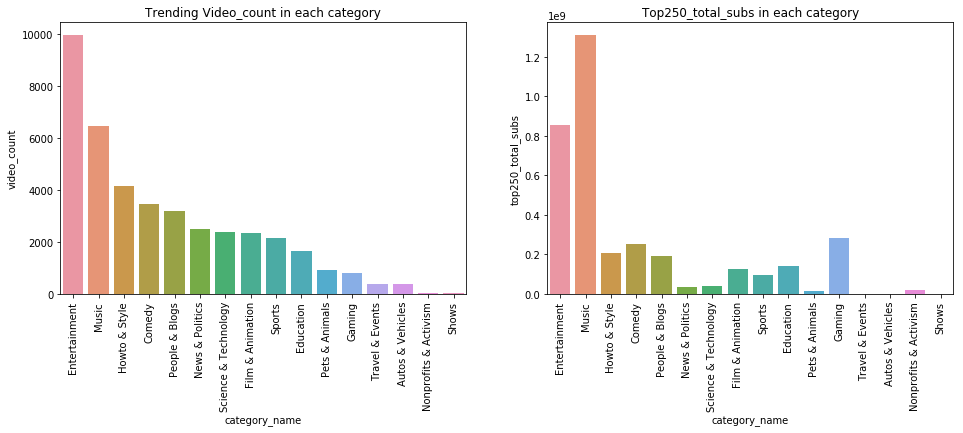

In [147]:
colname = ['video_count', 'top250_total_subs']
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
for i, col in enumerate(colname):
    g = sns.barplot(data = trending_top250, x = trending_top250['category_name'], y = col, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    if i == 0:
        axes[i].set_title('Trending ' + colname[i].capitalize()+ ' in each category')
    else:
        axes[i].set_title(colname[i].capitalize()+ ' in each category')


# fig.subplots_adjust(wspace=.4)
# plt.legend(bbox_to_anchor=(1.05, 2.225), loc=2, ncol=1)

- Does most categories with most trending videos in accordance with the most profitable categories?
- Does more trending videos make them enter top 250 us youtubers -> find the youtubers that have trending videos
- Does top 250 youtubers (by grade, subs, views) means they have they most trending videos 